In [1]:
# Plotting and analysis
# behavior figures

# this version was built with pandas version 2.2.2 and numpy version 1.26.4
# looking at bulk tuning curves in one plot for ACx and IC

#%% file import pre procesing
import pandas as pd
import numpy as np


import math 

#plots
import matplotlib.pyplot as plt
import seaborn as sns

from scipy.signal import savgol_filter

from array import *
from scipy.signal import find_peaks

from sklearn import preprocessing
print(np.__version__)

from scipy.ndimage import median_filter

import auto_tuning_functions as auto_tune

1.26.4


In [2]:
# frequency and intensity list for later
# these are the frequency and intensity parameters used for your recordings
freq_ls = [1000.,  1500.,  2000.,  3000.,  4000.,  6000.,  8000., 12000.,
    16000., 20000., 24000., 30000., 35000., 40000., 45000., 50000.,
    55000., 60000., 65000.]



db_ls = [0,10,20,30,40,50,60,70,80,90]

ac_spks = pd.read_pickle('spiking_data_example') # read in the data (can made using my unit extractor program link in README)



In [3]:
# evoked_df create a dataframe of all relevant firing properties
# sanity argument set to 'yes' plots a sanity plot for every unit so you can inspect output visually
evoked_df = auto_tune.make_evoked_df(ac_spks,freq_ls,db_ls,sanity='no')

# make_db_df takes the evoked df across intensities and produces the average of each relevant firing property
# outputs a neat dataframe for plotting across intensity
db_df = auto_tune.make_dB_df(evoked_df=evoked_df)
db_df

c:\Users\admin\tuninator\auto_tuning_functions.py:338: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  plot_df = plot_df._append({'latency': lat_mean, 'abs_peak_fr': peak_mean,


,latency,abs_peak_fr,rel_peak_fr,resp_duration,first_bin,last_bin,smoothed_data,spks_10_40ms,file,channel,genotype
0,0.044055,14.375000,11.298631,0.008125,0.032805,0.052180,11.325886,46.250000,F:\Fmr1 SD Tanks\WT\BA190305A\Block-2,17,WT
1,0.025404,14.833333,11.859107,0.040833,0.016238,0.066238,11.079477,47.333333,F:\Fmr1 SD Tanks\WT\BA190305A\Block-2,17,WT
2,0.018862,20.111111,16.747318,0.017778,0.010529,0.036640,14.083462,66.666667,F:\Fmr1 SD Tanks\WT\BA190305A\Block-2,17,WT
3,0.011516,35.642857,32.330093,0.013571,0.007587,0.025087,31.369941,83.214286,F:\Fmr1 SD Tanks\WT\BA190305A\Block-2,17,WT
4,0.006977,50.272727,46.930312,0.034091,0.005613,0.041068,49.821814,92.363636,F:\Fmr1 SD Tanks\WT\BA190305A\Block-2,17,WT
...,...,...,...,...,...,...,...,...,...,...,...
155,0.008772,52.352941,48.085669,0.020294,0.005831,0.029067,47.956816,118.882353,F:\Fmr1 SD Tanks\WT\BA190305A\Block-2,32,WT
156,0.006637,62.117647,57.977770,0.034412,0.003989,0.041048,58.911670,142.000000,F:\Fmr1 SD Tanks\WT\BA190305A\Block-2,32,WT
157,0.006435,69.000000,64.552673,0.046154,0.003358,0.052589,63.703121,201.230769,F:\Fmr1 SD Tanks\WT\BA190305A\Block-2,32,WT
158,0.005795,71.588235,67.223639,0.047353,0.001383,0.053148,67.200679,244.176471,F:\Fmr1 SD Tanks\WT\BA190305A\Block-2,32,WT


In [4]:
# threshold_df calculates the threshold based on the input output function across frequencies
# output is a dataframe that shows threshold for each unit
# used for other d-prime and q-value calculations later


thresh_df = auto_tune.add_thresh_col(dB_df=db_df,db_ls=db_ls,sanity='no')
thresh_df

,threshold,file,channel,genotype
0,30,F:\Fmr1 SD Tanks\WT\BA190305A\Block-2,17,WT
1,30,F:\Fmr1 SD Tanks\WT\BA190305A\Block-2,18,WT
2,40,F:\Fmr1 SD Tanks\WT\BA190305A\Block-2,19,WT
3,30,F:\Fmr1 SD Tanks\WT\BA190305A\Block-2,20,WT
4,30,F:\Fmr1 SD Tanks\WT\BA190305A\Block-2,21,WT
5,50,F:\Fmr1 SD Tanks\WT\BA190305A\Block-2,22,WT
6,40,F:\Fmr1 SD Tanks\WT\BA190305A\Block-2,23,WT
7,40,F:\Fmr1 SD Tanks\WT\BA190305A\Block-2,24,WT
8,40,F:\Fmr1 SD Tanks\WT\BA190305A\Block-2,25,WT
9,40,F:\Fmr1 SD Tanks\WT\BA190305A\Block-2,26,WT


In [5]:
# same as threshold df except across frequencies and saving the peak frequency

cf_df = auto_tune.make_freq_df(evoked_df,freq_ls)
cf_df

,file,channel,genotype,CF
0,F:\Fmr1 SD Tanks\WT\BA190305A\Block-2,17,WT,20000.0
1,F:\Fmr1 SD Tanks\WT\BA190305A\Block-2,18,WT,30000.0
2,F:\Fmr1 SD Tanks\WT\BA190305A\Block-2,19,WT,45000.0
3,F:\Fmr1 SD Tanks\WT\BA190305A\Block-2,20,WT,30000.0
4,F:\Fmr1 SD Tanks\WT\BA190305A\Block-2,21,WT,6000.0
5,F:\Fmr1 SD Tanks\WT\BA190305A\Block-2,22,WT,45000.0
6,F:\Fmr1 SD Tanks\WT\BA190305A\Block-2,23,WT,20000.0
7,F:\Fmr1 SD Tanks\WT\BA190305A\Block-2,24,WT,6000.0
8,F:\Fmr1 SD Tanks\WT\BA190305A\Block-2,25,WT,4000.0
9,F:\Fmr1 SD Tanks\WT\BA190305A\Block-2,26,WT,6000.0


In [6]:
# first and most crude d-prime approach
# takes all contigious True evoked cells
# gives a very broad estaimate of d-prime
dprime_df = auto_tune.get_dprime(evoked_df,cf_df,thresh_df,db_ls=db_ls,freq_ls=freq_ls)
dprime_df

,file,channel,genotype,dprime
0,F:\Fmr1 SD Tanks\WT\BA190305A\Block-2,17,WT,3.207027
1,F:\Fmr1 SD Tanks\WT\BA190305A\Block-2,18,WT,2.728219
2,F:\Fmr1 SD Tanks\WT\BA190305A\Block-2,19,WT,3.279252
3,F:\Fmr1 SD Tanks\WT\BA190305A\Block-2,20,WT,3.536748
4,F:\Fmr1 SD Tanks\WT\BA190305A\Block-2,21,WT,3.444025
5,F:\Fmr1 SD Tanks\WT\BA190305A\Block-2,22,WT,3.673947
6,F:\Fmr1 SD Tanks\WT\BA190305A\Block-2,23,WT,2.679338
7,F:\Fmr1 SD Tanks\WT\BA190305A\Block-2,24,WT,3.274449
8,F:\Fmr1 SD Tanks\WT\BA190305A\Block-2,25,WT,3.349344
9,F:\Fmr1 SD Tanks\WT\BA190305A\Block-2,26,WT,2.768639


In [7]:
# 2nd d-prime option
# computes the threshold for each frequency using the same threshold function prior
# for each frequency the cells below threshold intensity are deemed non-evoked and above are evoked
savgoldprim_df = auto_tune.savgol_dprime(evoked_df,db_ls,sanity='no')
savgoldprim_df

c:\Users\admin\tuninator\auto_tuning_functions.py:705: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  plot_df = plot_df._append({'dprime':dprime,


,dprime,file,channel,genotype
0,2.526001,F:\Fmr1 SD Tanks\WT\BA190305A\Block-2,17,WT
1,2.235077,F:\Fmr1 SD Tanks\WT\BA190305A\Block-2,18,WT
2,2.345284,F:\Fmr1 SD Tanks\WT\BA190305A\Block-2,19,WT
3,3.122771,F:\Fmr1 SD Tanks\WT\BA190305A\Block-2,20,WT
4,2.557591,F:\Fmr1 SD Tanks\WT\BA190305A\Block-2,21,WT
5,2.550076,F:\Fmr1 SD Tanks\WT\BA190305A\Block-2,22,WT
6,1.923424,F:\Fmr1 SD Tanks\WT\BA190305A\Block-2,23,WT
7,2.494127,F:\Fmr1 SD Tanks\WT\BA190305A\Block-2,24,WT
8,2.222616,F:\Fmr1 SD Tanks\WT\BA190305A\Block-2,25,WT
9,2.098023,F:\Fmr1 SD Tanks\WT\BA190305A\Block-2,26,WT


In [8]:
# computes bandwidth and another d-prime metric
# bandwidth is found by plotting the tuning curve sum at each intensity
# an I/O threshold is set based on the current intensity, and all cells above this threshold are deemed evoked
# this  gives a d-prime measurement at each intensity 
# also utilizes the prior computed threshold value for each unit to give d-prime relative to threshold
# this same I/O function is used to determine the edges of bandwidth, the first and last points to cross the threshold line

bandwidth_df = auto_tune.get_bandwidth(evoked_df=evoked_df,thresh_df=thresh_df,freq_ls=freq_ls,db_ls=db_ls,cf_df=cf_df,sanity='no')
bandwidth_df

c:\Users\admin\tuninator\auto_tuning_functions.py:900: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  plot_df = plot_df._append({'dprime':dprime,


,dprime,low_freq,high_freq,BW,CF,db_above_threshold,peaks,file,channel,genotype,Q-value,actual_dB
0,2.019564,55000.0,60000.0,0.125531,20000.0,-30,one,F:\Fmr1 SD Tanks\WT\BA190305A\Block-2,17,WT,15.932334,0.0
1,1.548848,1000.0,35000.0,5.129283,20000.0,-20,multi,F:\Fmr1 SD Tanks\WT\BA190305A\Block-2,17,WT,0.389918,10.0
2,1.873016,24000.0,35000.0,0.544321,20000.0,-10,one,F:\Fmr1 SD Tanks\WT\BA190305A\Block-2,17,WT,3.674306,20.0
3,1.780148,1500.0,50000.0,5.058894,20000.0,0,multi,F:\Fmr1 SD Tanks\WT\BA190305A\Block-2,17,WT,0.395343,30.0
4,2.119928,1000.0,55000.0,5.781360,20000.0,10,multi,F:\Fmr1 SD Tanks\WT\BA190305A\Block-2,17,WT,0.345939,40.0
...,...,...,...,...,...,...,...,...,...,...,...,...
155,2.889690,24000.0,60000.0,1.321928,24000.0,20,one,F:\Fmr1 SD Tanks\WT\BA190305A\Block-2,32,WT,1.815530,50.0
156,2.692924,16000.0,35000.0,1.129283,24000.0,30,one,F:\Fmr1 SD Tanks\WT\BA190305A\Block-2,32,WT,2.125242,60.0
157,3.796701,4000.0,30000.0,2.906891,24000.0,40,one,F:\Fmr1 SD Tanks\WT\BA190305A\Block-2,32,WT,0.825624,70.0
158,3.819934,3000.0,30000.0,3.321928,24000.0,50,one,F:\Fmr1 SD Tanks\WT\BA190305A\Block-2,32,WT,0.722472,80.0


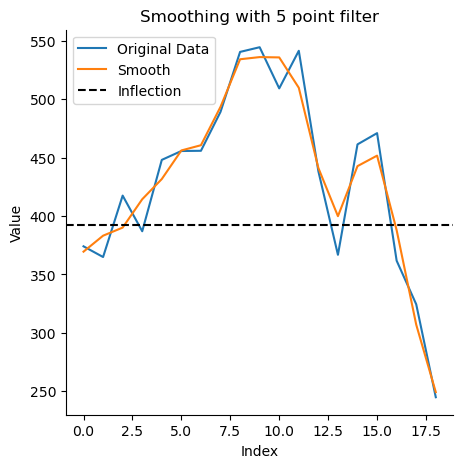

TypeError: object of type 'numpy.float64' has no len()

In [9]:
prec_df = auto_tune.area_under_curve(evoked_df=evoked_df,freq_ls=freq_ls,sanity='yes')
prec_df

In [ ]:
# this outputs sanity plots for the True (non-thresholded) tuning curve
# as well as the firing rate based tuning curves
# this is mainly for checking all other functions as this is essentially the raw data visualized
crude_data = auto_tune.plot_evoke_status_crude(evoked_df)